<a href="https://colab.research.google.com/github/aunz/ds-upright/blob/master/Insight_Data_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This notebook is part of [Insight](http://insightdatascience.com/) Data Challenge exercise

## Data

Breast Cancer Wisconsin (Original) Data Set

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Original)

In [0]:
import numpy as np # basic array/math manipulation
import pandas as pd # dataframe


import matplotlib.pyplot as plt # plotting
import seaborn as sns

In [138]:
data = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',
    header=None,
    names=['id', 'thickness', 'size', 'shape', 'adhesion', 'cell_size', 'nuclei', 'chromatin', 'nucleoli', 'mitoses', 'class'],
    index_col=0
)

data.head()

,thickness,size,shape,adhesion,cell_size,nuclei,chromatin,nucleoli,mitoses,class
id,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


## Exploratory analysis

The dataset contains 699 observations (instances) and 10 variables (features)

In [28]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1000025 to 897471
Data columns (total 10 columns):
thickness    699 non-null int64
size         699 non-null int64
shape        699 non-null int64
adhesion     699 non-null int64
cell_size    699 non-null int64
nuclei       699 non-null object
chromatin    699 non-null int64
nucleoli     699 non-null int64
mitoses      699 non-null int64
class        699 non-null int64
dtypes: int64(9), object(1)
memory usage: 60.1+ KB
None
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: nuclei, dtype: int64


These variables are supposed to be all int according. Howerver, nuclei is an object.

16 of them are missing, denoated by ?

We are going to convert it to 1 for now (1 is the most common)



In [139]:
nuclei_ori = data['nuclei'].copy() # make an original copy in case we need to change it later

data['nuclei'] = data['nuclei'].replace('?', 1).astype(int)
data['nuclei'].value_counts().sort_index()

1     418
2      30
3      28
4      19
5      30
6       4
7       8
8      21
9       9
10    132
Name: nuclei, dtype: int64

## Target variable

Class: 2 for benign, 4 for malignant

We want to recategorise benign to 0, malignant to 1 (for classification later)

In [0]:
data['class'] = data['class'].replace({ 2: 0, 4: 1 })

In [141]:
pd.concat([data[i].value_counts() for i in data.columns], 1)

,thickness,size,shape,adhesion,cell_size,nuclei,chromatin,nucleoli,mitoses,class
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,458.0
1,145.0,384.0,353.0,407.0,47.0,418.0,152.0,443.0,579.0,241.0
2,50.0,45.0,59.0,58.0,386.0,30.0,166.0,36.0,35.0,NaN
3,108.0,52.0,56.0,58.0,72.0,28.0,165.0,44.0,33.0,NaN
4,80.0,40.0,44.0,33.0,48.0,19.0,40.0,18.0,12.0,NaN
5,130.0,30.0,34.0,23.0,39.0,30.0,34.0,19.0,6.0,NaN
6,34.0,27.0,30.0,22.0,41.0,4.0,10.0,22.0,3.0,NaN
7,23.0,19.0,30.0,13.0,12.0,8.0,73.0,16.0,9.0,NaN
8,46.0,29.0,28.0,25.0,21.0,21.0,28.0,24.0,8.0,NaN
9,14.0,6.0,7.0,5.0,2.0,9.0,11.0,16.0,NaN,NaN


### Correlation 

Uniformity of size and shape are highly correlated.

Class 1 (maglinant) is also highly with uniformity of cell size, shape, nuclei; least with mitoses

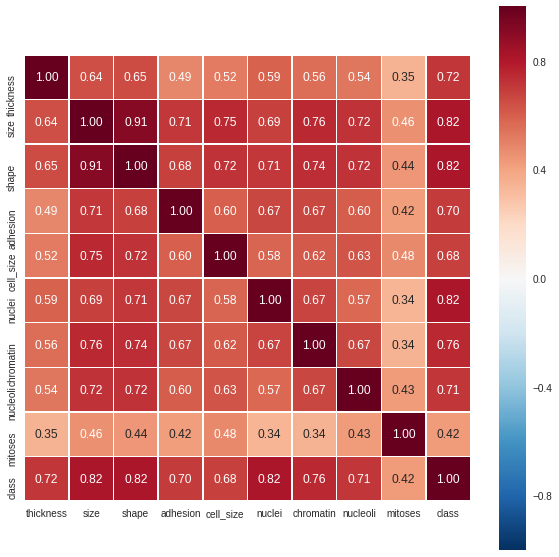

In [142]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), center=0, square=True, linewidths=.5, annot=True, fmt='.2f');

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


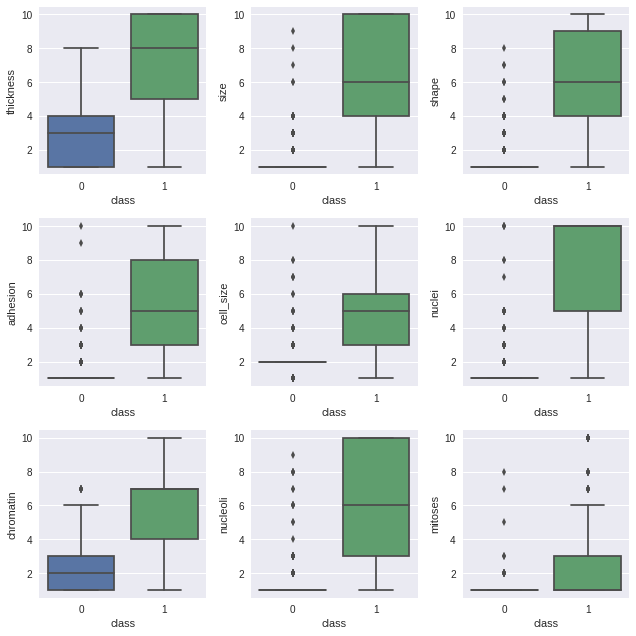

In [143]:
plt.figure(figsize=(9, 9))

for i, j in enumerate(data.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x = data['class'], y = data[j]); # swarmplot takes too long

plt.tight_layout();

# Modelling

class  size
0      1       380
       2        37
       3        27
       4         9
       6         2
       7         1
       8         1
       9         1
1      1         4
       2         8
       3        25
       4        31
       5        30
       6        25
       7        18
       8        28
       9         5
       10       67
Name: size, dtype: int64